# Train in Human in the loop (HITL)




In [1]:
# Récuper les labels des noms des images dans le dossier

# parcourir dossier et lister les noms pour récuperer les labels
import os
data_dir = './../data/raw2/train/images/'

noms = sorted(os.listdir(data_dir))
classes = ['biodegradable', 'cardboard', 'glass', 'metal', 'paper', 'plastic']

# Si dans les noms qui sont dans labels il y a des noms qui sont dans classes, netoyer labels et garder que noms de classes
labels = []
for name in noms:
    for c in classes:
        if name.startswith(c):
            labels.append(c)
            break
print(labels)

['biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradable', 'biodegradabl

In [2]:
for i in range(len(labels)):
    if labels[i] == 'biodegradable':
        labels[i] = 'trash'

print(labels)

['trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 'trash', 

In [21]:
# Labels:
#    0: cardboard
#    1: glass
#    2: metal
#    3: paper
#    4: plastic
#    5: trash

def transform_labels_to_int(label : str) -> int:
    match labels:
        case 'cardboard':
            return 0
        case 'glass':
            return 1
        case 'metal':
            return 2
        case 'paper':
            return 3
        case 'plastic':
            return 4
        case 'trash':
            return 5


In [4]:
import os
import random
from pathlib import Path
import numpy as np

import matplotlib.pyplot as plt
import tensorflow as tf

2025-12-11 11:15:17.762763: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# Set the random seed for reproducibility
seed = 77

os.environ['PYTHONHASHSEED'] = str(seed)
random.seed(seed)
np.random.seed(seed)

os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

tf.random.set_seed(seed)
tf.config.threading.set_inter_op_parallelism_threads(1)
tf.config.threading.set_intra_op_parallelism_threads(1)

In [6]:
IMG_SIZE = (256, 256)
BATCH_SIZE = 32

In [7]:
ds = tf.keras.utils.image_dataset_from_directory(
    "../data/raw2/train/images/.",
    labels=None,
    label_mode=None,
    color_mode="rgb",
    batch_size=BATCH_SIZE,
    image_size=IMG_SIZE,
    seed=seed,
    verbose=1,
)

Found 7324 files.


I0000 00:00:1765448128.602422    4321 gpu_device.cc:2020] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3584 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [8]:
ds.element_spec

TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None)

2025-12-11 11:15:34.987688: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


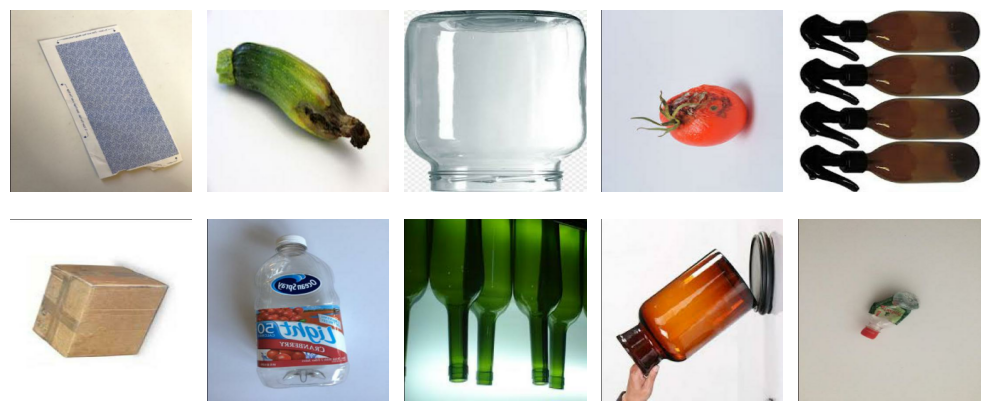

In [9]:
# Plot 10 sample images
plt.figure(figsize=(10, 5), tight_layout=True)
for images in ds.take(1):
    for i in range(10):
        ax = plt.subplot(2, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.axis("off")

In [10]:
# Normalize the data
normalization_layer = tf.keras.layers.Rescaling(
    1.0 / 255
)
ds = ds.map(lambda x: normalization_layer(x))

In [11]:
# Importer le modèle pré-entraîné de Artifact Registry Google with bentoml

# dvc pull (dossier model)
# bentoml models import /home/cris/mlops/MLOps-project/model/trash_classifier_model.bentomodel
# mettre le chemin absolu du fichier .bentomodel

import bentoml
from bentoml.keras import load_model

# Récupérer la dernière version du modèle importé
model_ref = bentoml.models.get("trash_classifier_model:latest")
print(model_ref)

/tmp/ipykernel_4321/638817549.py:8: BentoMLDeprecationWarning: `bentoml.keras` is deprecated since BentoML v1.4 and will be removed in a future version.
  from bentoml.keras import load_model


Model(tag="trash_classifier_model:ciqmwpguswhiypxm")


In [12]:
# Charger le modèle Keras
model = load_model(model_ref)

In [13]:
import numpy as np
from pathlib import Path

history_path = Path("../model/history.npy")
history = np.load(history_path, allow_pickle=True).item()

prev_epochs = len(history["loss"])
print("Epochs déjà entraînées :", prev_epochs)

Epochs déjà entraînées : 9


In [14]:
# evaluer dataset
preds= model.predict(ds)
#predictions=tf.argmax(preds, axis=1)

2025-12-11 11:16:05.555778: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:473] Loaded cuDNN version 91700


229/229 ━━━━━━━━━━━━━━━━━━━━ 19s 68ms/step


In [15]:
probs = tf.nn.softmax(preds, axis=-1).numpy() # # (N, num_classes)

In [16]:
probs[1]

array([0.0015814 , 0.0042383 , 0.8656129 , 0.10014494, 0.00602231,
       0.02240017], dtype=float32)

In [24]:
# index de la classe prédite pour chaque image
y_pred = np.argmax(probs, axis=-1)         # (N,)

# label prédit pour chaque image
y_true = [transform_labels_to_int(label) for label in labels]

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred, target_names=labels, output_dict=True)